In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tomo_encoders.reconstruction.recon import recon_all
from tomo_encoders import DataFile
import dxchange
from tomo_encoders import viewer

spefile module not found
netCDF4 module not found
EdfFile module not found
astropy module not found
olefile module not found


In [2]:
fname = '/data02/MyArchive/tomo_datasets/Eaton_beamtime/April2nd_2022/Chou_Plate_049.h5'

In [3]:
projs, flat, dark, theta = dxchange.read_aps_32id(fname, sino = (400,408))
print(f"shape of projeciton array: {projs.shape}")
flat = np.median(flat, axis = 0)
dark = np.median(dark, axis = 0)
center = projs.shape[-1]/2.0

shape of projeciton array: (3201, 8, 3232)


	TIME copying data to gpu: 87.39 ms
	TIME fbp filter: 180.41 ms
	TIME back-projection: 1595.13 ms
	TIME copying data to gpu: 85.98 ms
	TIME fbp filter: 38.41 ms
	TIME back-projection: 1588.05 ms
	TIME copying data to gpu: 85.78 ms
	TIME fbp filter: 38.46 ms
	TIME back-projection: 1590.40 ms
	TIME copying data to gpu: 86.00 ms
	TIME fbp filter: 38.57 ms
	TIME back-projection: 1597.62 ms
	TIME copying data to gpu: 85.72 ms
	TIME fbp filter: 38.56 ms
	TIME back-projection: 1603.41 ms
	TIME copying data to gpu: 85.74 ms
	TIME fbp filter: 38.54 ms
	TIME back-projection: 1603.89 ms
	TIME copying data to gpu: 85.93 ms
	TIME fbp filter: 38.54 ms
	TIME back-projection: 1606.03 ms
	TIME copying data to gpu: 85.93 ms
	TIME fbp filter: 38.78 ms
	TIME back-projection: 1605.99 ms
	TIME copying data to gpu: 91.55 ms
	TIME fbp filter: 38.59 ms
	TIME back-projection: 1611.67 ms
	TIME copying data to gpu: 92.23 ms
	TIME fbp filter: 38.77 ms
	TIME back-projection: 1611.91 ms
	TIME copying data to gpu: 86

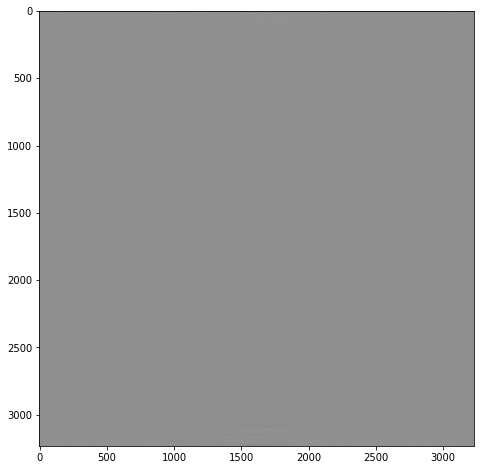

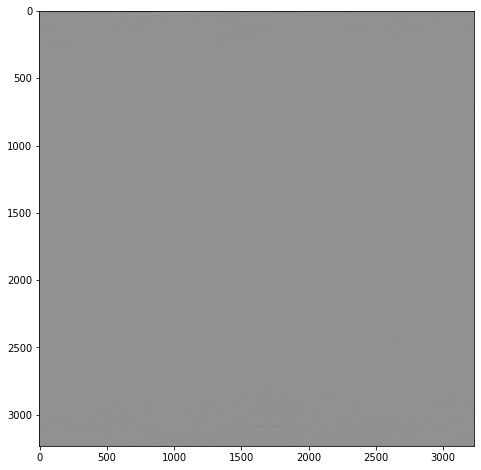

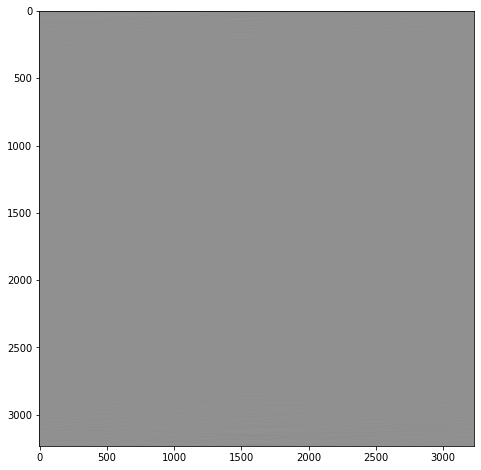

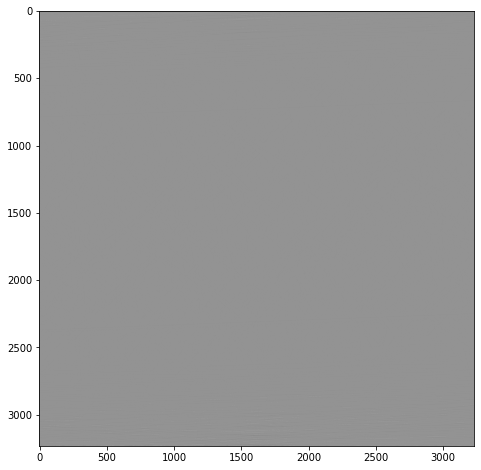

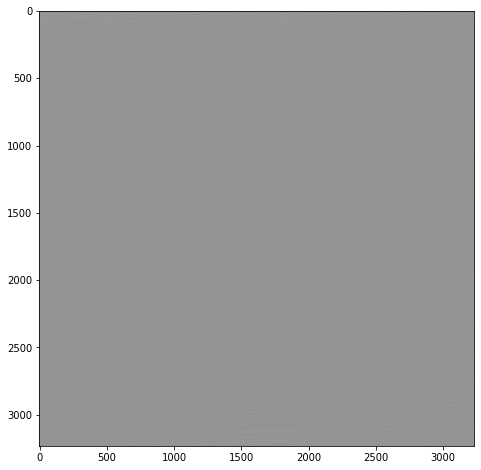

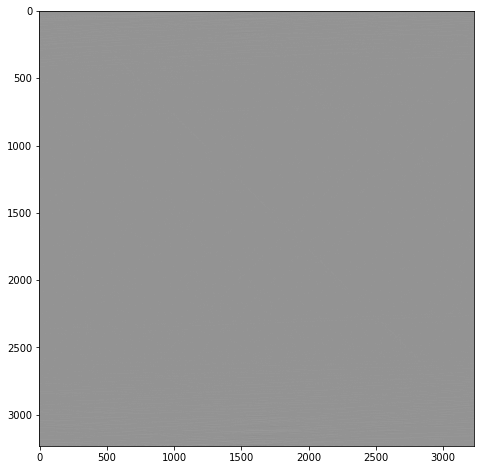

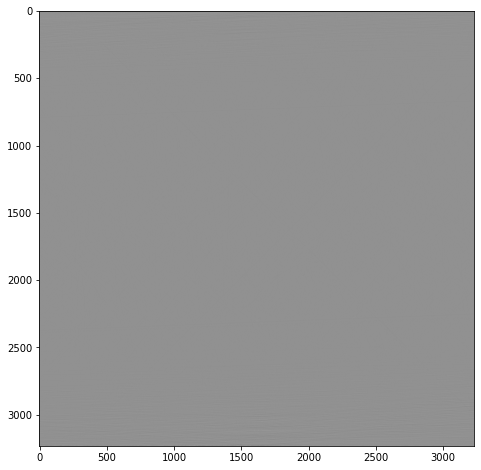

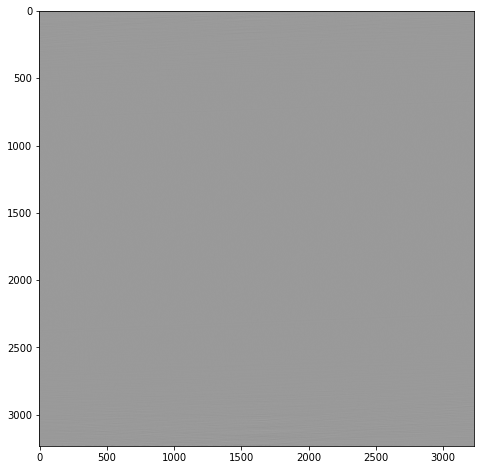

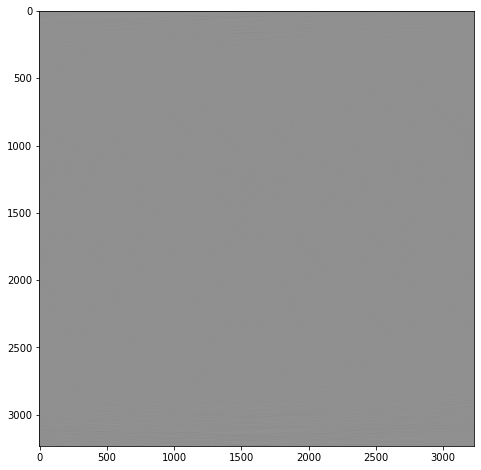

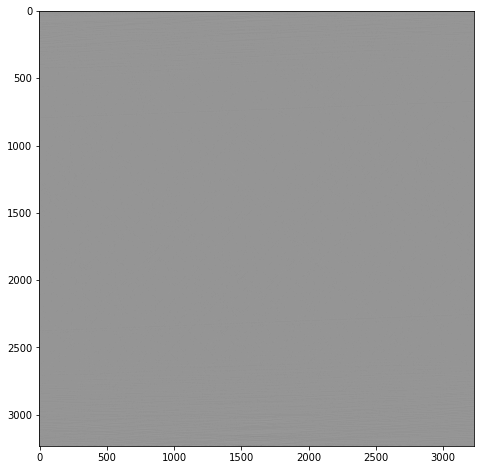

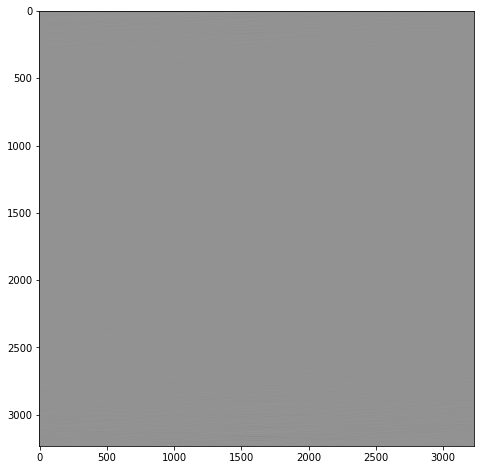

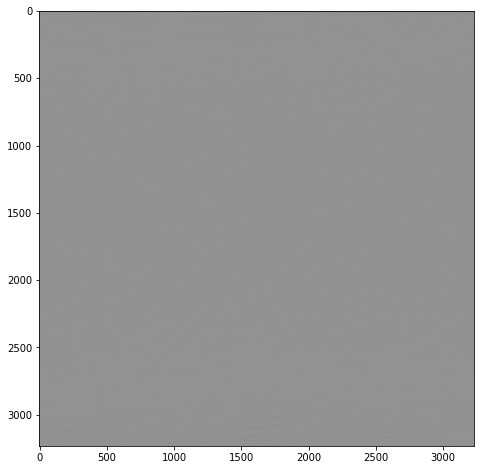

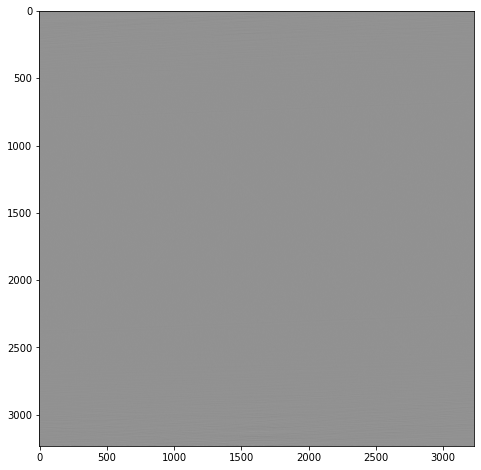

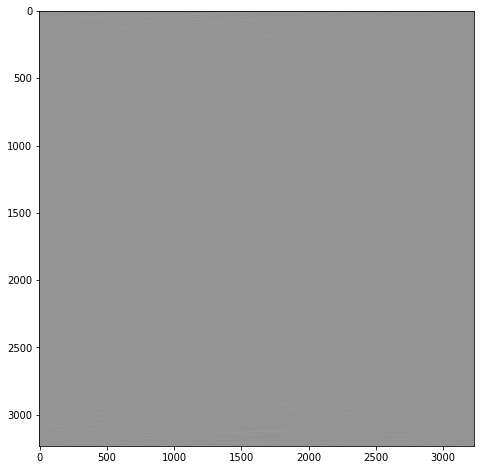

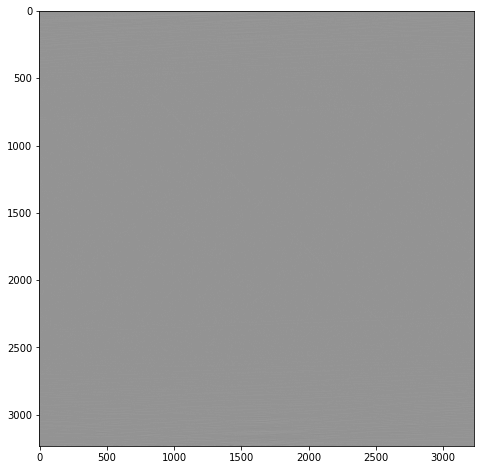

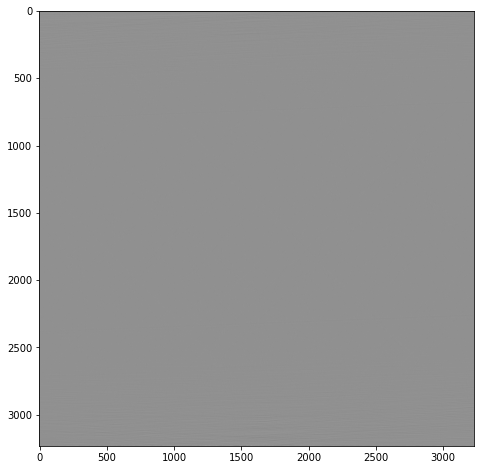

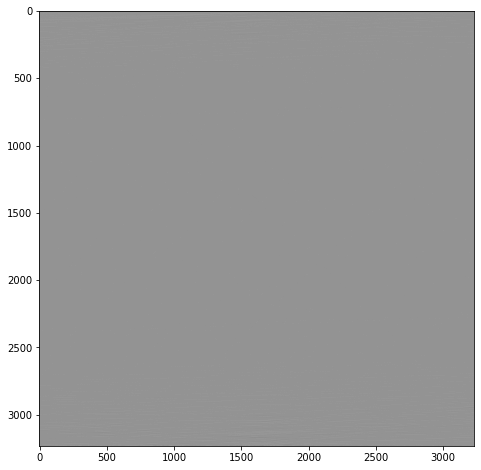

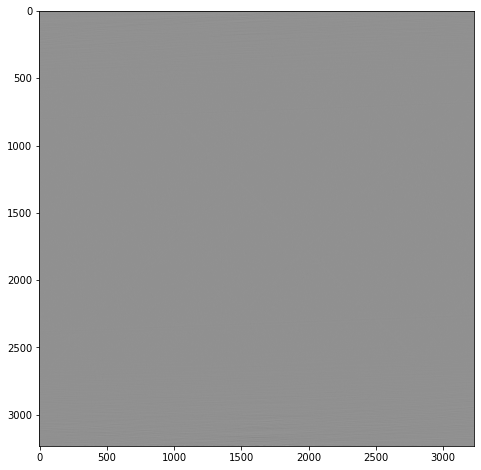

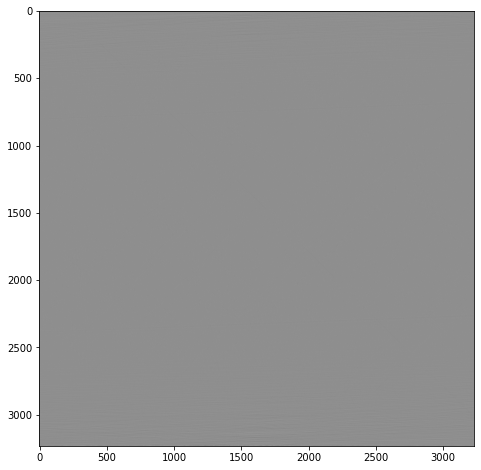

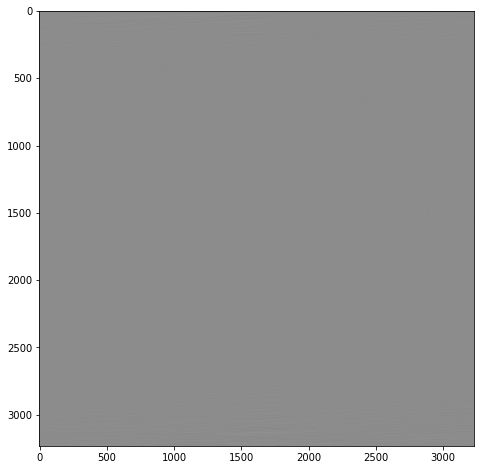

In [4]:
for ii in range(-10,10):
    vol = recon_all(projs, theta, center+ii, 8, flat, dark)
    fig, ax = plt.subplots(1,1,figsize = (8,8))
    ax.imshow(vol[4], cmap = 'gray')

In [5]:
from tomo_encoders.misc.voxel_processing import modified_autocontrast

In [6]:
h = modified_autocontrast(vol, s = 0.1)

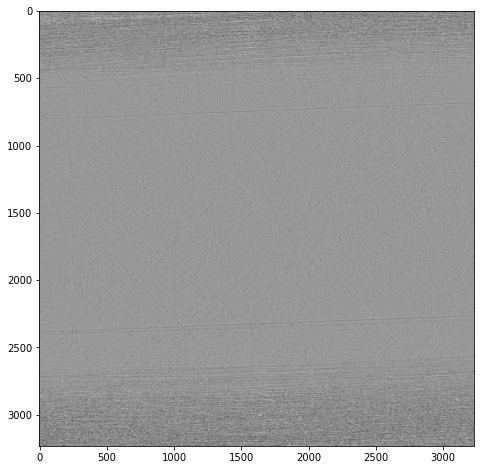

In [7]:
fig, ax = plt.subplots(1,1,figsize = (8,8))
ax.imshow(np.clip(vol[4],*h), cmap = 'gray')